## **Modelo de Regresión**
El objetivo de este ejercicio es encontrar un modelo de regresion lineal que permita predecir el salario segun los años de experiencia.

Utilizaremos el algoritmo de "LinearRegression"  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [0]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



## Lectura de datos y exploración

Leer el fichero de datos 

In [0]:
file_path = 'salary_data.csv'
data = pd.read_csv(file_path)

Listar las primeras filas del fichero para ver los datos

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


¿cuantas filas y columnas tienen los datos?


In [5]:
data.shape

(30, 2)

Explore la cantidad de registros, la media, el desvio y los cuartiles de las columnas numéricas.

In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Preparación de los datos

Defina la columna objetivo a predecir en "y"  y "X" el dataframe con las características que se utilizarán para definir el modelo. Tenga en cuenta que solo se utilizarán las columnas numéricas.

In [0]:
# target object y
y = data["Salary"]
# Create X
features=["YearsExperience"]
X = data[features]


Defina las particiones para entrenamiento y de validación con semila=1 e imprima cuantas filas utilizará para entrenamiento y cuantas para validar

In [0]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [10]:
print(train_X.count())


YearsExperience    22
dtype: int64


In [11]:
print(val_y.count())

8


## Definición del modelo

Defina el modelo utilizando regresion Lineal

In [0]:
#Specify Model
salary = LinearRegression()


Entrene el modelo 

In [13]:
# Fit Model
salary.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

¿Cuales son los coreficientes del modelo de regresion?

In [14]:
salary.coef_


array([9261.56845302])

Grafique los resultados del modelo y los datos de entrenamiento

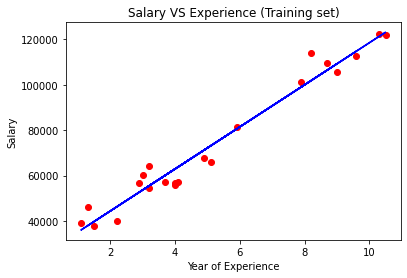

In [15]:
# Visualizing the Training set results
plt.scatter(train_X, train_y, color='red')
plt.plot(train_X, salary.predict(train_X), color='blue')
plt.title('Salary VS Experience (Training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()


Grafique el modelo con los datos de test

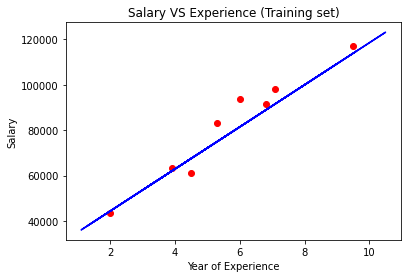

In [18]:
plt.scatter(val_X, val_y, color='red')
plt.plot(train_X, salary.predict(train_X), color='blue')
plt.title('Salary VS Experience (Training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

## Predicción y validación del modelo 

Utilice el modelo para realizar las predicciones con los datos de validación y calcule el valor MAE (mean absolute error) obtenido sin haber indicado la cantidad de hojas (max_leaf_nodes).

In [19]:
val_predictions = salary.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE %f" %val_mae)

Validation MAE 5215.553723


In [20]:
print(val_X)
print(val_predictions)

    YearsExperience
17              5.3
21              7.1
10              3.9
19              6.0
14              4.5
20              6.8
26              9.5
3               2.0
[ 74978.61852009  91649.44173553  62012.42268586  81461.7164372
  67569.36375767  88870.97119962 113877.20602278  44415.44262512]


¿Cuanto cobrará con 5, 10, 15, 20 años de experiencia?

In [21]:
X_custom = pd.DataFrame({'YearsExperience':[5,10,15,20,30]})
val_predict_custom=salary.predict(X_custom)
print(val_predict_custom)

[ 72200.14798418 118507.99024929 164815.8325144  211123.67477951
 303739.35930974]


Calcular las predicciones con todos los datos, el MAE total y el porcentaje de error respecto a la media de los valores

In [22]:
pred_tot=salary.predict(X)
mae=mean_absolute_error(pred_tot, y)
print(mae)
print(y.mean())
print((mae / y.mean())*100)

4719.387594431744
76003.0
6.209475408117764


Explore al menos 10 valores calculados con la predicción y compare con los valore originales

In [23]:
#imprimir en una linea los 
j=0
for i in range(10): 
    print("real value: {} predicted value: {} Dif: {} ".format(pred_tot[i],y[j],pred_tot[i]- y[j]))
    j=j+1

real value: 36080.03101739561 predicted value: 39343 Dif: -3262.9689826043905 
real value: 37932.34470800003 predicted value: 46205 Dif: -8272.655291999967 
real value: 39784.65839860447 predicted value: 37731 Dif: 2053.6583986044716 
real value: 44415.44262511555 predicted value: 43525 Dif: 890.4426251155528 
real value: 46267.756315719984 predicted value: 39891 Dif: 6376.756315719984 
real value: 52750.854232835496 predicted value: 56642 Dif: -3891.145767164504 
real value: 53677.01107813771 predicted value: 60150 Dif: -6472.988921862292 
real value: 55529.32476874214 predicted value: 54445 Dif: 1084.324768742139 
real value: 55529.32476874214 predicted value: 64445 Dif: -8915.675231257861 
real value: 60160.10899525323 predicted value: 57189 Dif: 2971.1089952532275 
